#### reference
opencv tutorial code : https://docs.opencv.org/3.4.3/dc/dc3/tutorial_py_matcher.html </br>
Type error: required argument 'outlmg' (pos6) not found : https://stackoverflow.com/questions/31631352/typeerror-required-argument-outimg-pos-6-not-found </br>
cv2.SIFT error : https://stackoverflow.com/questions/18561910/cant-use-surf-sift-in-opencv 


# Feature matching 
그림 비교 및 유사도 측정 </br>
유사도(Match Score) = (유사한 특징임을 설명해주는 feature spot 수 / 추출한 feature의 수) *100

### Brute-Force Matcher with ORB Descriptor


In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [18]:
img1 = cv.imread('img1.jpg',0)          # queryImage
img2 = cv.imread('img2.jpg',0)      # trainImage
img3 = cv.imread('img3.jpg',0)

In [35]:
def fm_ORB(img1,img2):
    original = cv.imread(img1,0)
    compare = cv.imread(img2,0)
    
    # Initiate ORB detector
    orb = cv.ORB_create()

    # find the keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(original,None)
    kp2, des2 = orb.detectAndCompute(compare,None)

    # create BFMatcher object
    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

    # Match descriptors.
    matches = bf.match(des1,des2)

    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)

    # Draw first 10 matches.
    result = cv.drawMatches(original,kp1,compare,kp2,matches[:20], None, flags=2)

    plt.figure(figsize=(10,13))
    plt.imshow(result)
    plt.show()

In [31]:
fm_ORB(img1,img2)

TypeError: bad argument type for built-in operation

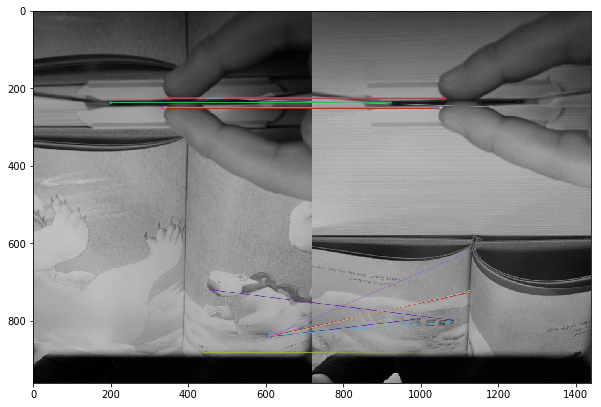

In [22]:
fm_ORB(img1,img3)

In [29]:
import os 
os.getcwd()

'C:\\Users\\seoyein\\Desktop\\업무\\_산업체 과제\\동심_test'

### With Similar

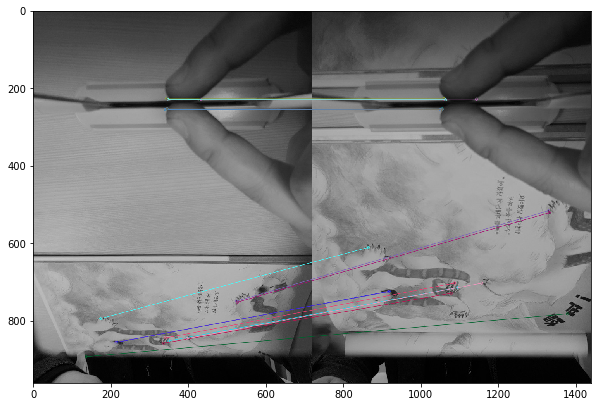

None


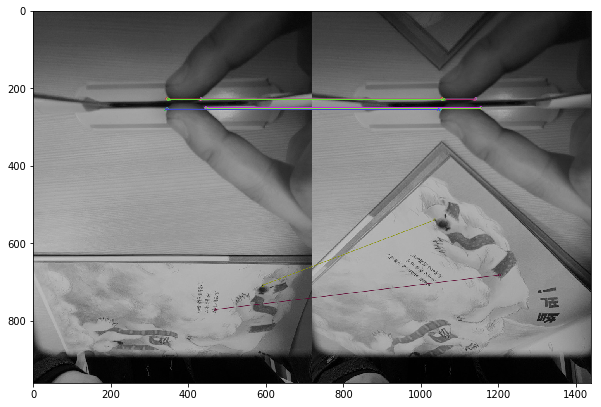

None


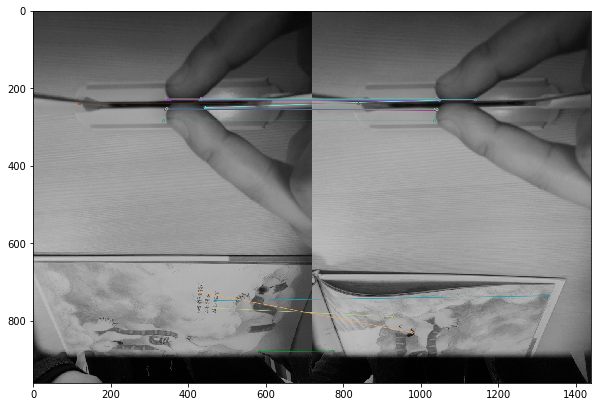

None


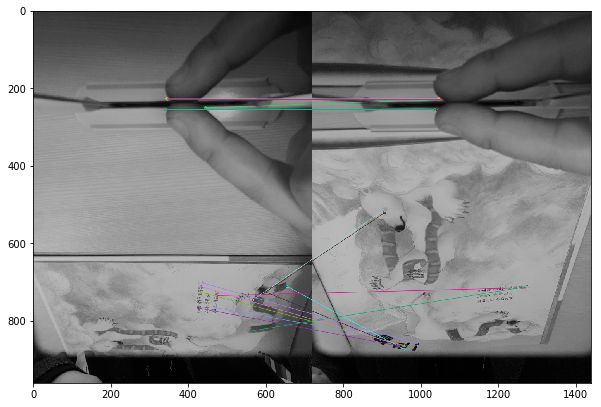

None


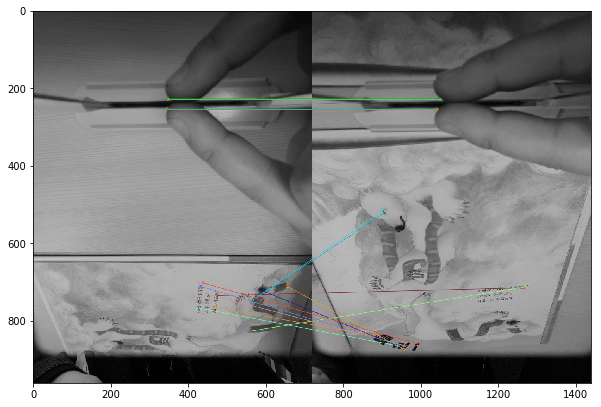

None


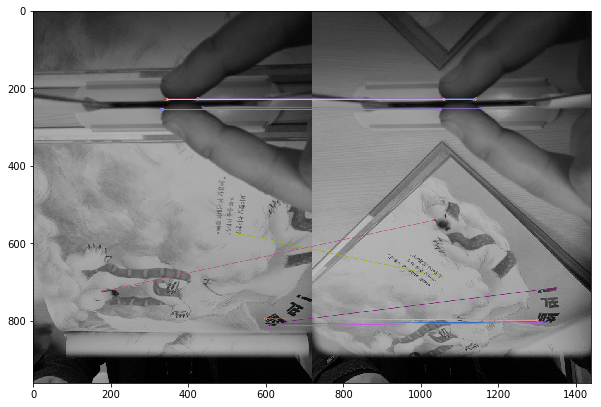

None


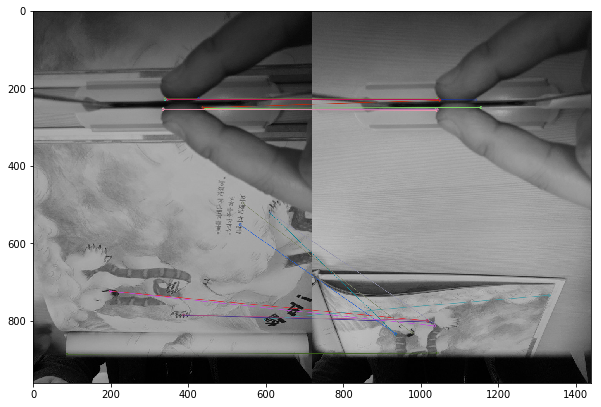

None


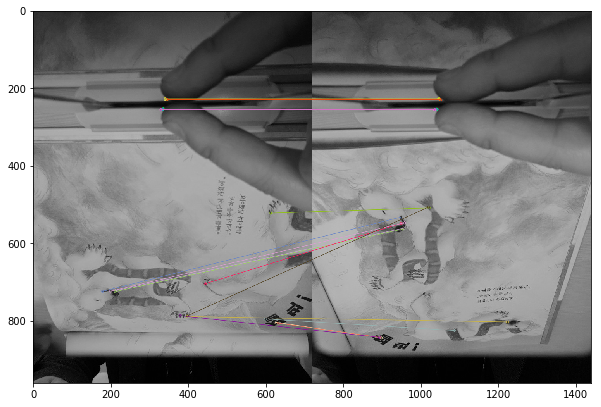

None


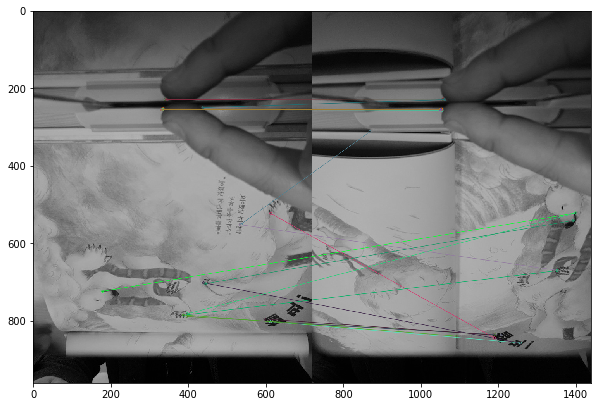

None


In [36]:
import os 
path_dir = "..\\picture\\com_set2"
file_list = os.listdir(path_dir)

for i,j in enumerate(file_list):
#     if i >= len(file_list):
#         break
#     else: 
    print(fm_ORB(path_dir+"\\"+j,path_dir+"\\"+file_list[i+1]))
    if i+2 >= len(file_list):
        break 
    else:
        print(fm_ORB(path_dir+"\\"+j,path_dir+"\\"+file_list[i+2]))
    if i+3 >= len(file_list):
        break 
    else:
        print(fm_ORB(path_dir+"\\"+j,path_dir+"\\"+file_list[i+3]))
    if i+4 >= len(file_list):
        break 
    else:
        print(fm_ORB(path_dir+"\\"+j,path_dir+"\\"+file_list[i+4]))
    if i+5 >= len(file_list):
        break 
    else:
        print(fm_ORB(path_dir+"\\"+j,path_dir+"\\"+file_list[i+4]))

### With unsimilar

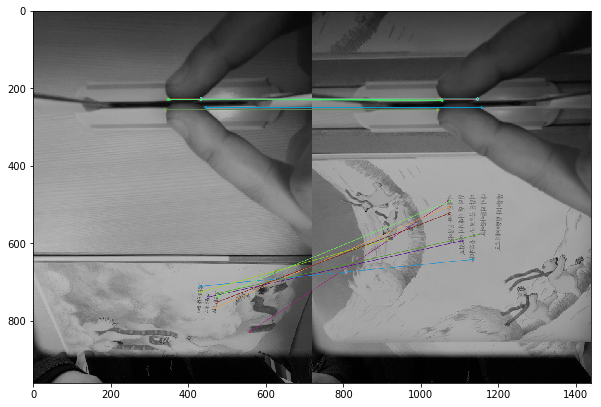

None


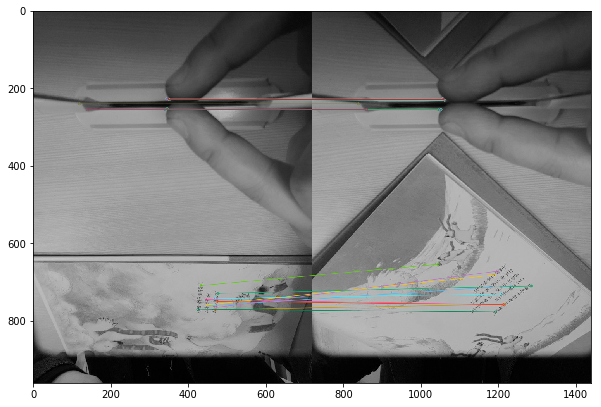

None


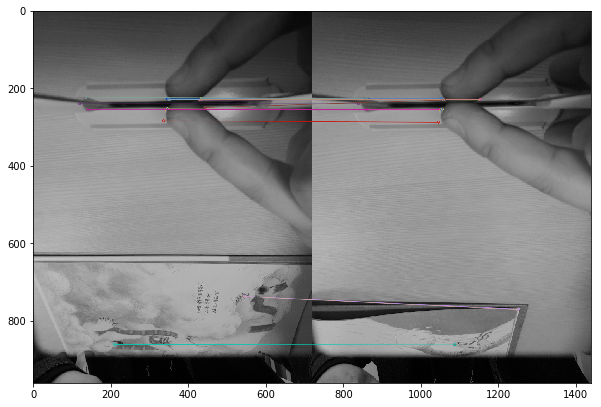

None


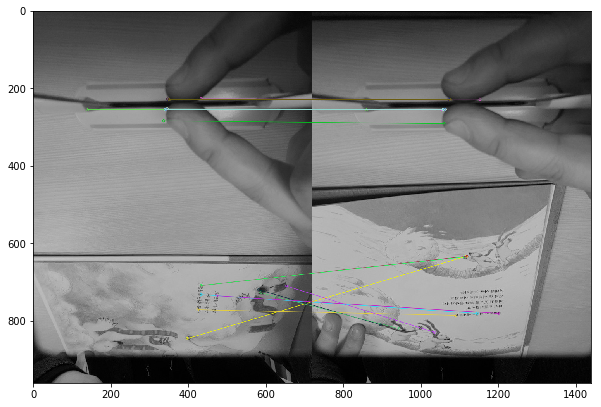

None


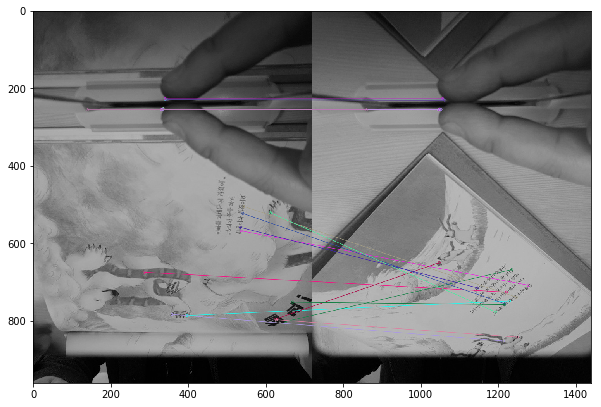

None


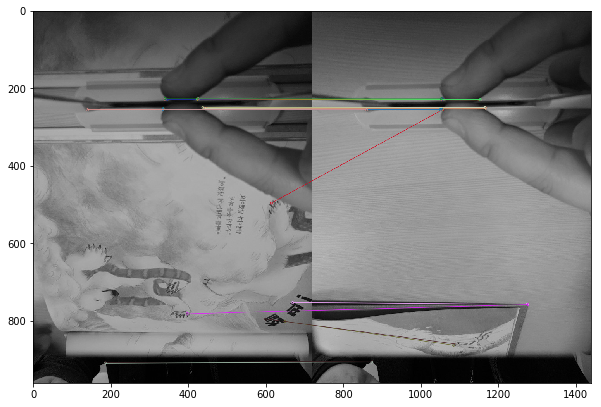

None


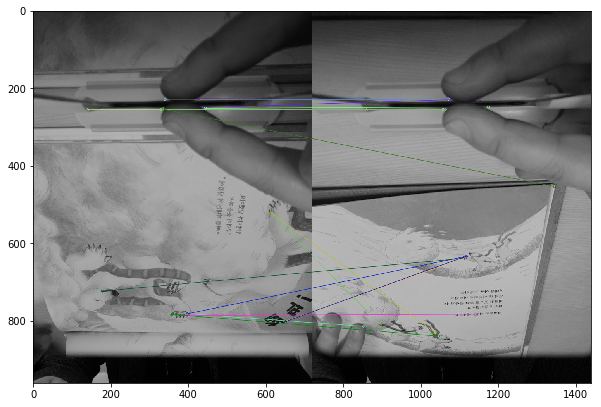

None


IndexError: list index out of range

In [38]:
path_dir_1 = "..\\picture\\com_set2"
path_dir_2 = "..\\picture\\com_set3"
file_list_1 = os.listdir(path_dir_1)
file_list_2 = os.listdir(path_dir_2)

for i,j in enumerate(file_list_1):
    if i+1 >= len(file_list_1):
        break
    else: 
        print(fm_ORB(path_dir_1+"\\"+j,path_dir_2+"\\"+file_list_2[i+1]))
    if i+2 >= len(file_list):
        break 
    else:
        print(fm_ORB(path_dir_1+"\\"+j,path_dir_2+"\\"+file_list_2[i+2]))
    if i+3 >= len(file_list):
        break 
    else:
        print(fm_ORB(path_dir_1+"\\"+j,path_dir_2+"\\"+file_list_2[i+3]))
    if i+4 >= len(file_list):
        break 
    else:
        print(fm_ORB(path_dir_1+"\\"+j,path_dir_2+"\\"+file_list_2[i+4]))




### Brute-Force Matching with SIFT Descriptors and Ratio Test

In [6]:
def feature_matching_2(original,compare):    
    # Initiate SIFT detector
    # SIFT detector code changed cv.SIFT() got error 
    sift = cv.xfeatures2d.SIFT_create()

    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(original,None)
    kp2, des2 = sift.detectAndCompute(compare,None)

    # BFMatcher with default params
    bf = cv.BFMatcher()
    matches = bf.knnMatch(des1,des2, k=2)

    # Apply ratio test
    good = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])
            
    # cv.drawMatchesKnn expects list of lists as matches.
    plt.figure(figsize=(10,13))
    visual = cv.drawMatchesKnn(original,kp1,compare,kp2,good,None,flags=2)

    ## 추가         
    number_keypoints = 0
    if len(kp1) <= len(kp2):
        number_keypoints = len(kp1)
    else:
        number_keypoints = len(kp2)


    return ("Keypoints 1ST Image: " + str(len(kp1)), 
            "Keypoints 2ND Image: " + str(len(kp2)), 
            "GOOD Matches:%s" %len(good), 
            "Match Score: %s" 
            %(len(good) / number_keypoints * 100),
            plt.imshow(visual))      

    
    
    

('Keypoints 1ST Image: 782',
 'Keypoints 2ND Image: 2894',
 'GOOD Matches:82',
 'Match Score: 10.485933503836318',
 <matplotlib.image.AxesImage at 0x21600ff5b38>)

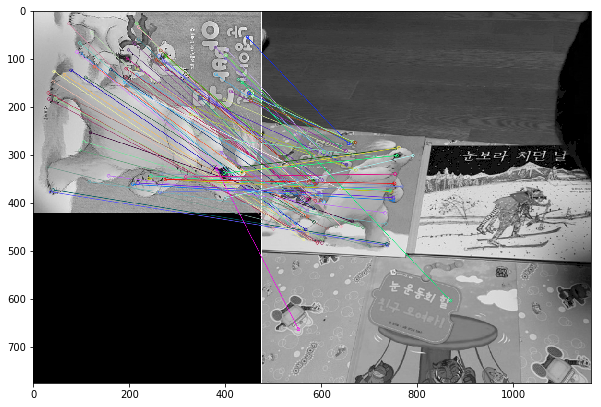

In [7]:
feature_matching_2(img1,img2)

('Keypoints 1ST Image: 782',
 'Keypoints 2ND Image: 1660',
 'GOOD Matches:11',
 'Match Score: 1.4066496163682864',
 <matplotlib.image.AxesImage at 0x216011a0198>)

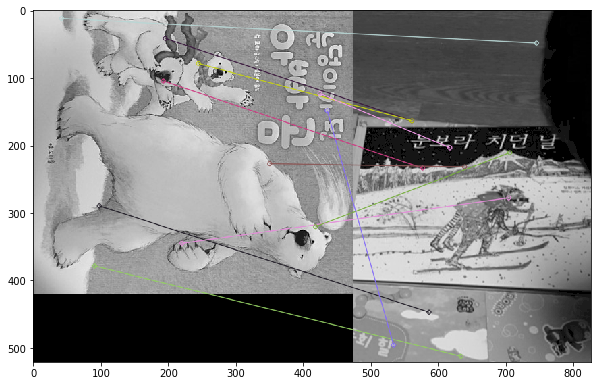

In [8]:
feature_matching_2(img1,img3)



### FLANN based Matcher

In [9]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

In [10]:
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2

In [11]:
def feature_matching_3(original,compare):
    # Initiate SIFT detector
    sift = cv.xfeatures2d.SIFT_create()

    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(original,None)
    kp2, des2 = sift.detectAndCompute(compare,None)

    # FLANN parameters
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks=100)   # or pass empty dictionary
    flann = cv.FlannBasedMatcher(index_params,search_params)
    matches = flann.knnMatch(des1,des2,k=2) # 2순위 매칭 결과까지 취함 
    
    # Need to draw only good matches, so create a mask
    matchesMask = [[0,0] for i in range(len(matches))]
    good = []
    
    ## 추가 
    number_keypoints = 0
    if len(kp1) <= len(kp2):
        number_keypoints = len(kp1)
    else :
        number_keypoints = len(kp2)

       
    # ratio test as per Lowe's paper
    for i,(m,n) in enumerate(matches):
        if m.distance < 0.68*n.distance:
            matchesMask[i]=[1,0]
            good.append(m)
            
    draw_params = dict(matchColor = (0,255,0),
                       singlePointColor = (255,0,0),
                       matchesMask = matchesMask,
                       flags = 0)

    visual = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

    plt.figure(figsize=(10,13))
    
    
    return ("Keypoints 1ST Image: " + str(len(kp1)), 
        "Keypoints 2ND Image: " + str(len(kp2)), 
        "GOOD Matches:%s" %len(good), 
        "Match Score: %s" %(len(good) / number_keypoints * 100),
        plt.imshow(visual))      

    plt.imshow(img3)
    plt.show()

('Keypoints 1ST Image: 782',
 'Keypoints 2ND Image: 2894',
 'GOOD Matches:56',
 'Match Score: 7.161125319693094',
 <matplotlib.image.AxesImage at 0x21601090f98>)

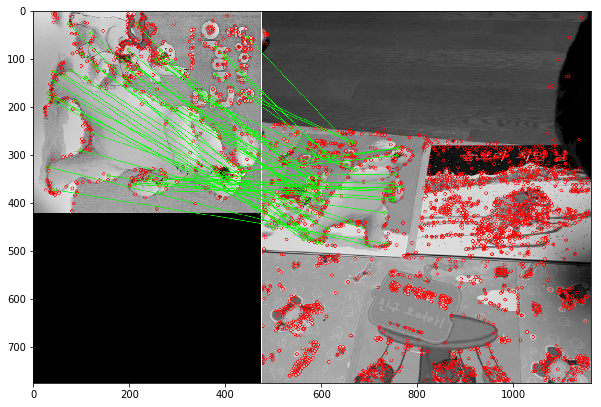

In [12]:
feature_matching_3(img1,img2)

('Keypoints 1ST Image: 782',
 'Keypoints 2ND Image: 1660',
 'GOOD Matches:3',
 'Match Score: 0.3836317135549872',
 <matplotlib.image.AxesImage at 0x216010e75f8>)

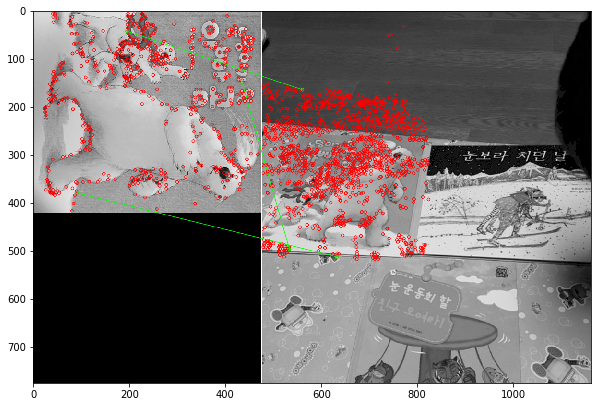

In [13]:
feature_matching_3(img1,img3)

# Feature classification

## scoring 
match_score를 통해 확인
minimum으로 threshold를 정해서 일치 여부 비교 

In [26]:
def match_score(im1,im2, func):
    original = cv.imread(str(im1),0)
    compare = cv.imread(str(im2),0)
    if str(func) == 'fm_2' :
        sift = cv.xfeatures2d.SIFT_create()

        kp1, des1 = sift.detectAndCompute(original,None)
        kp2, des2 = sift.detectAndCompute(compare,None)

        bf = cv.BFMatcher()
        matches = bf.knnMatch(des1,des2, k=2)

        good = []
        for m,n in matches:
            if m.distance < 0.75*n.distance:
                good.append([m])
                
        number_keypoints = 0
        if len(kp1) <= len(kp2):
            number_keypoints = len(kp1)
        else :
            number_keypoints = len(kp2)
        
        match_score = (len(good) / number_keypoints) * 100
        
        return match_score

    if str(func) == 'fm_3' :
        sift = cv.xfeatures2d.SIFT_create()

        kp1, des1 = sift.detectAndCompute(original,None)
        kp2, des2 = sift.detectAndCompute(compare,None)

        # FLANN parameters
        FLANN_INDEX_KDTREE = 1
        index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
        search_params = dict(checks=100)   # or pass empty dictionary
        flann = cv.FlannBasedMatcher(index_params,search_params)
        matches = flann.knnMatch(des1,des2,k=2) # 2순위 매칭 결과까지 취함 

        # Need to draw only good matches, so create a mask
        matchesMask = [[0,0] for i in range(len(matches))]
        good = []

        number_keypoints = 0
        if len(kp1) <= len(kp2):
            number_keypoints = len(kp1)
        else :
            number_keypoints = len(kp2)


        # ratio test as per Lowe's paper
        for i,(m,n) in enumerate(matches):
            if m.distance < 0.68*n.distance:
                matchesMask[i]=[1,0]
                good.append(m)
    
        match_score = (len(good) / number_keypoints) * 100
    
        return match_score

In [35]:
print("score between unsimilar image : %s" %match_score('bear_real.png', 'no_bear.png', 'fm_2'),
      "score between scene image and real : %s" %match_score('bear_real.png', 'bear_in_scene.png', 'fm_3'),
      "score between same image : %s" %match_score('bear_real.png',"bear_real.png", "fm_3"), sep = "\n")

score between unsimilar image : 1.4066496163682864
score between scene image and real : 7.033248081841433
score between same image : 100.0
